# Bayes Estimator

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Arturo Espinosa Romero <[eromero@correo.uady.mx](mailto:eromero@correo.uady.mx)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

# Practice 1

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(0)

### Parameters

#### $N$: number of samples

In [3]:
N: int = 10000
'N = {}'.format(N)

'N = 10000'

#### $mg$: mean ($μ$) to generate data 

In [4]:
mg: float = random.random()
'μ ≈ {} ({})'.format(round(mg, 3), mg)

'μ ≈ 0.844 (0.8444218515250481)'

#### $dg^2$: standard deviation ($σ^2$) to generate data

In [5]:
dg: float = random.random()
d2g: float = dg ** 2
'σ2 ≈ {} ({})'.format(d2g, dg)

'σ2 ≈ 0.5744948769365904 (0.7579544029403025)'

#### $X$: random variable (vector)

In [6]:
X: np.ndarray = np.random.normal(mg, dg, N)
X[0:3]

array([0.77337561, 1.24654463, 0.48262425])

#### Histogram

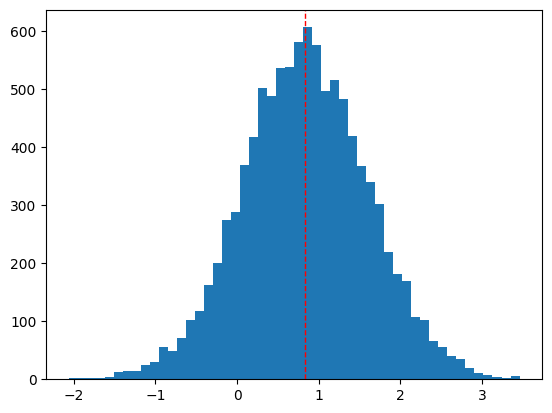

In [7]:
plt.hist(X, bins=50)
plt.axvline(X.mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()

### Real values

#### $m$: mean ($μ$) real

In [8]:
m: float = X.mean()
'μ ≈ {} ({})'.format(round(m, 3), m)

'μ ≈ 0.837 (0.8371309557969411)'

#### $d2\'$: standard deviation ($σ^2 \'$) real

In [9]:
d: float = X.std()
d2: float = d ** 2
'σ2 ≈ {} ({})'.format(round(d2, 3), d2)

'σ2 ≈ 0.589 (0.5886570330990272)'

In [10]:
M: np.array = np.array([X[0]])
D2: np.array = np.array([0])
for k in range(1, len(X)):
    _m: float = ((k - 1) * M[-1] + X[k]) / k
    _d2: float = ((k - 1) * D2[-1] + (X[k] - _m) ** 2) / k
    M = np.append(M, _m)
    D2 = np.append(D2, _d2)
M[0:3], D2[0:3]

(array([0.77337561, 1.24654463, 0.86458444]),
 array([0.        , 0.        , 0.07294679]))

### Plot $μ$ and $σ^2$

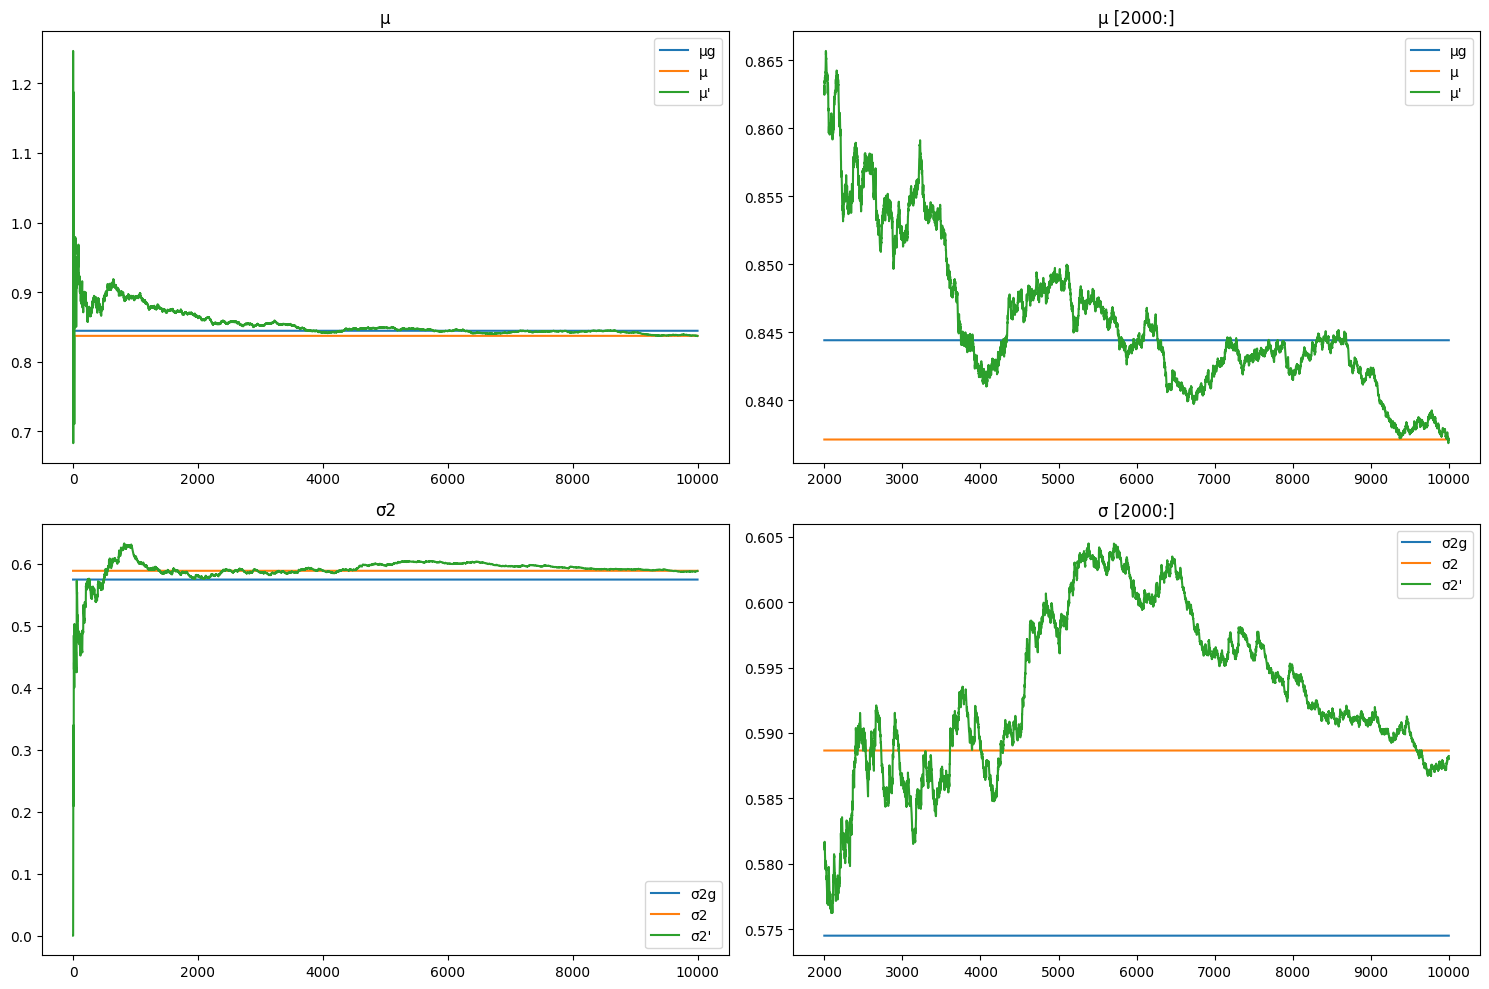

In [11]:
def plot_m_d2():
  fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 10))

  _MG = np.full(N,mg)
  _M = np.full(N,m)

  _D2G = np.full(N,d2g)
  _D2 = np.full(N,d2)

  x_cut: int = int(N/5)
  _x = np.arange(N-x_cut) + x_cut

  ax[0][0].plot(_MG, label='μg')
  ax[0][0].plot(_M, label='μ')
  ax[0][0].plot(M, label="μ'")
  ax[0][0].set_title("μ")
  ax[0][0].legend()

  ax[0][1].plot(_x, _MG[x_cut:], label='μg')
  ax[0][1].plot(_x, _M[x_cut:], label='μ')
  ax[0][1].plot(_x,M[x_cut:], label="μ'")
  ax[0][1].set_title("μ ["+str(x_cut)+":]")
  ax[0][1].legend()

  ax[1][0].plot(_D2G, label='σ2g')
  ax[1][0].plot(_D2, label='σ2')
  ax[1][0].plot(D2, label="σ2'")
  ax[1][0].set_title("σ2")
  ax[1][0].legend()

  ax[1][1].plot(_x, _D2G[x_cut:], label='σ2g')
  ax[1][1].plot(_x, _D2[x_cut:], label='σ2')
  ax[1][1].plot(_x,D2[x_cut:], label="σ2'")
  ax[1][1].set_title("σ ["+str(x_cut)+":]")
  ax[1][1].legend()

  plt.tight_layout()
  plt.show()

plot_m_d2()

In [12]:
mg, m, M[-1]

(0.8444218515250481, 0.8371309557969411, 0.8371373319687968)

In [13]:
d2g, d2, D2[-1]

(0.5744948769365904, 0.5886570330990272, 0.588235933253535)